In [88]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [100]:
# (a) pandas and convert it into a geopandas.GeoDataFrame
df = pd.read_csv('./global_power_plant_database.csv')
df_ll = pd.DataFrame(
    {'Latitude': df['latitude'],
     'Longitude': df['longitude']})
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df_ll.Longitude, df_ll.Latitude))

C:\Users\rupak\AppData\Local\Temp\ipykernel_17732\1162603218.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./global_power_plant_database.csv')


In [101]:
# gdf.info()
# (b) Reduce the dataset such that it only includes hydropower plants
gdf_hydro = gdf [gdf['estimated_generation_note_2013'] == 'HYDRO-V1']
# gdf_hydro.info()

In [108]:
# (c) Identify the oldest and newest hydropower plant in the dataset.
gdf_hydro = gdf_hydro.dropna(subset=['commissioning_year'])
gdf_hydro["commissioning_year_n"] = pd.to_datetime(gdf_hydro["commissioning_year"],format="%Y")
gdf_hydro_sort = gdf_hydro.sort_values(by='commissioning_year_n')
oldest = gdf_hydro_sort.head(1)
newest = gdf_hydro_sort.tail(1)
print(oldest['commissioning_year_n'])
print(newest['commissioning_year_n'])

28213   1896-01-01
Name: commissioning_year_n, dtype: datetime64[ns]
33398   2019-01-01
Name: commissioning_year_n, dtype: datetime64[ns]


In [122]:
# (d) Identify the 3 countries with the largest hydropower capacities and list their total capacities in (e)
#     units of GW.
# gdf_hydro.head()
gdf_hydro_countries = gdf_hydro.groupby('country').sum().sort_values(by='capacity_mw',ascending=False)
top3 = gdf_hydro_countries.iloc[:3]
print(top3['capacity_mw'])

country
CHN    143451.3000
USA    101365.1000
BRA     83313.9129
Name: capacity_mw, dtype: float64


In [137]:
# (e) Identify the 5 hydropower plants with the highest capacity factor based on the estimated gener- (f )
#     ation in 2017. List their country, name, commissioning year, capacity and estimated generation
#     in 2017.
gdf_hydro_2017 = gdf_hydro.sort_values(by='estimated_generation_gwh_2017',ascending=False)
top5 = gdf_hydro_2017[:5]
top5[['country','name','commissioning_year','capacity_mw','estimated_generation_gwh_2017']]

,country,name,commissioning_year,capacity_mw,estimated_generation_gwh_2017
8755,CHN,Xiluodu,2013.000000,12600.0,56454.54
18280,PRY,Itaipu Binacional Dam (Paraguay part),1984.000000,7000.0,47320.15
8707,CHN,Xiangjiaba,2014.000000,6448.0,28890.38
28190,USA,Grand Coulee,1967.470333,6809.0,26111.69
3272,BRA,Tucuruí,1984.000000,8535.0,24000.54


In [146]:
gdf_hydro.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,commissioning_year_n
9,ALB,Albania,Bistrica 1,WRI1002169,27.0,39.9116,20.1047,Hydro,NaN,NaN,...,79.50,105.45,88.45,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (20.10470 39.91160),1965-01-01
10,ALB,Albania,Fierza,WRI1002170,500.0,42.2514,20.0431,Hydro,NaN,NaN,...,1503.72,1795.15,1648.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (20.04310 42.25140),1978-01-01
11,ALB,Albania,Koman,WRI1002171,600.0,42.1033,19.8224,Hydro,NaN,NaN,...,1805.63,2434.84,1982.72,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (19.82240 42.10330),1985-01-01
12,ALB,Albania,Lanabregas,WRI1002172,5.0,41.3428,19.8964,Hydro,NaN,NaN,...,14.64,20.04,15.23,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (19.89640 41.34280),1951-01-01
13,ALB,Albania,Shkopet,WRI1002173,24.0,41.6796,19.8305,Hydro,NaN,NaN,...,77.51,96.20,83.57,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (19.83050 41.67960),1963-01-01


In [156]:
df_for_map = gdf_hydro_2017[['country','capacity_mw','latitude','longitude','geometry']]
df_for_map

,country,capacity_mw,latitude,longitude,geometry
8755,CHN,12600.0,28.2600,103.6500,POINT (103.65000 28.26000)
18280,PRY,7000.0,-25.4081,-54.5889,POINT (-54.58890 -25.40810)
8707,CHN,6448.0,28.6437,104.3930,POINT (104.39300 28.64370)
28190,USA,6809.0,47.9575,-118.9773,POINT (-118.97730 47.95750)
3272,BRA,8535.0,-3.8322,-49.6522,POINT (-49.65220 -3.83220)
...,...,...,...,...,...
32405,USA,1.0,39.2721,-120.9325,POINT (-120.93250 39.27210)
32617,USA,1.0,46.7844,-122.7197,POINT (-122.71970 46.78440)
28678,USA,1.0,44.2965,-75.3361,POINT (-75.33610 44.29650)
24973,USA,1.0,39.2160,-120.8036,POINT (-120.80360 39.21600)


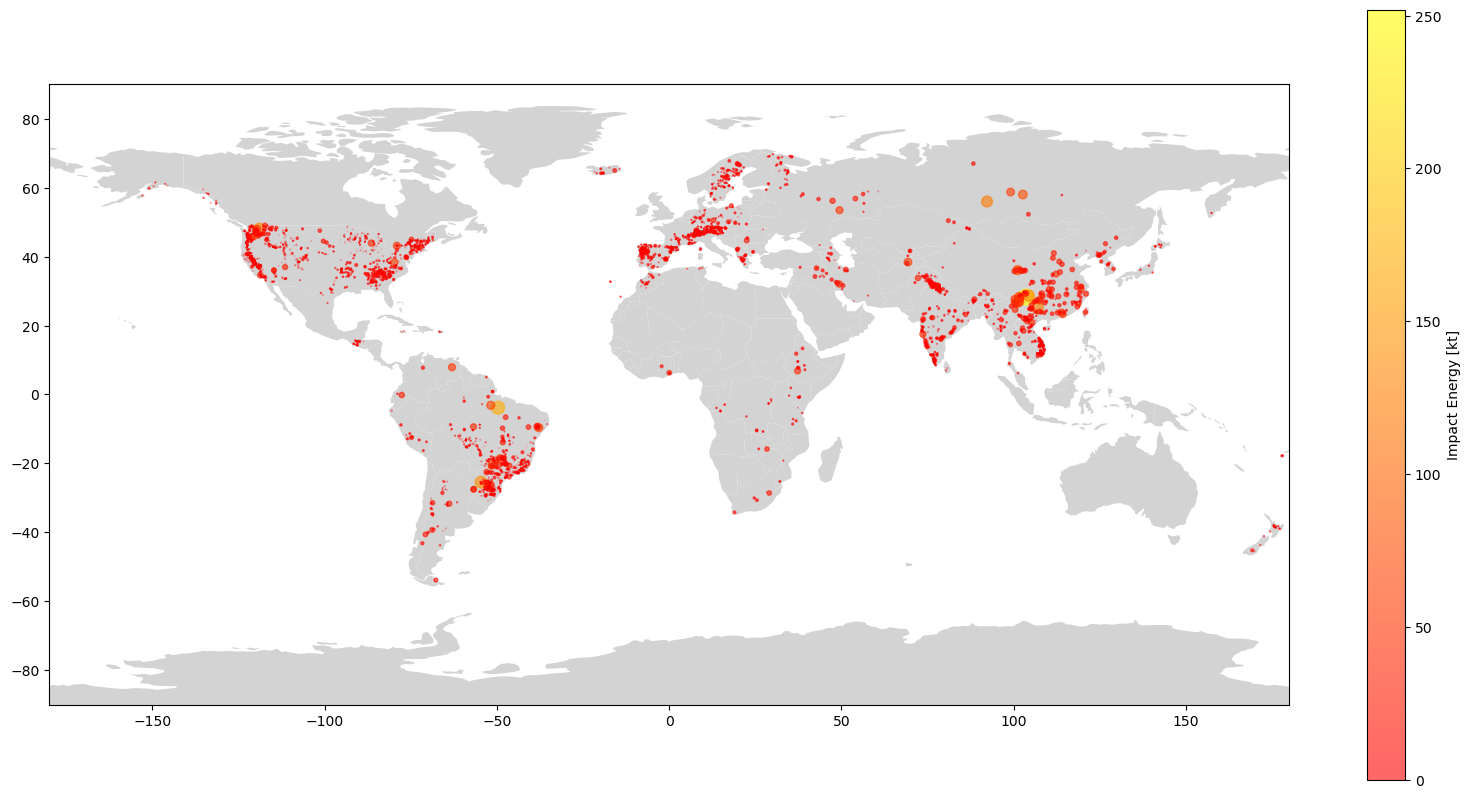

In [163]:
# (f) Create a global map with all hydropower plants. The marker size should be proportional to the (g)
#     nominal capacity (appropriately scaled) and coloured according to the estimated 2017 capacity
#     factor. Add coastlines and country borders for orientation
# From GeoPandas, our world map data
gdf_geom = gpd.GeoDataFrame(
    df_for_map, geometry=df_for_map['geometry'])
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(20, 10))

worldmap.plot(color="lightgrey", ax=ax)
# Plotting our Impact Energy data with a color map
x = df_for_map['longitude']
y = df_for_map['latitude']
z = df_for_map['capacity_mw']/100
plt.scatter(x, y, s=z, c=2*z, alpha=0.6, vmin=0, cmap='autumn')
plt.colorbar(label='Impact Energy [kt]')
# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.show()

In [183]:
# (g) Remove all hydropower plants with a missing commissioning year from the dataset. What share (h)
#     of hydropower plants is affected by this measure?
df_h = df [df['estimated_generation_note_2013'] == 'HYDRO-V1']

valid_commision_yr = df_h.count()['commissioning_year']
#print(valid_commision_yr)
#df_h.info()
print(df_h['commissioning_year'].isna().sum()/(df_h['commissioning_year'].isna().sum()+valid_commision_yr)*100)

46.961170512099045
